In [1]:
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
import pandas as pd
import os, sys

import fire
import re

import warnings
warnings.filterwarnings('ignore')

In [68]:
import sys
import os
import json
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [3]:
#Import the necessary methods from tweepy library  

#install tweepy if you don't have it
#!pip install tweepy
import json
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#sentiment analysis package
#!pip install textblob
from textblob import TextBlob

#general text pre-processor
#!pip install nltk
import nltk
from nltk.corpus import stopwords

#tweet pre-processor 
#!pip install tweet-preprocessor
import preprocessor as p

In [4]:
def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content  #.encode(BeautifulSoup.original_encoding)
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)
    
def get_elements(url, tag='',search={}, fname=None):
    """
    Downloads a page specified by the url parameter
    and returns a list of strings, one per tag element
    """
    
    if isinstance(url,str):
        response = simple_get(url)
    else:
        #if already it is a loaded html page
        response = url

    if response is not None:
        html = BeautifulSoup(response, 'html.parser')
        
        res = []
        if tag:    
            for li in html.select(tag):
                for name in li.text.split('\n'):
                    if len(name) > 0:
                        res.append(name.strip())
                       
                
        if search:
            soup = html            
            
            
            r = ''
            if 'find' in search.keys():
                print('findaing',search['find'])
                soup = soup.find(**search['find'])
                r = soup

                
            if 'find_all' in search.keys():
                print('findaing all of',search['find_all'])
                r = soup.find_all(**search['find_all'])
   
            if r:
                for x in list(r):
                    if len(x) > 0:
                        res.extend(x)
            
        return res

    # Raise an exception if we failed to get any data from the url
    raise Exception('Error retrieving contents at {}'.format(url))    
    
    
if get_ipython().__class__.__name__ == '__main__':
    fire(get_tag_elements)

In [5]:
res = get_elements('https://africafreak.com/100-most-influential-twitter-users-in-africa', tag = 'h2')
res

['100. Jeffrey Gettleman (@gettleman)',
 '99. Africa24 Media (@a24media)',
 '98. Scapegoat (@andiMakinana)',
 '97. Africa Check (@AfricaCheck)',
 '96. James Copnall (@JamesCopnall)',
 '95. Online Africa (@oafrica)',
 '94. Patrick Ngowi (@PatrickNgowi)',
 '93. DOS African Affairs (@StateAfrica)',
 '92. MoadowAJE (@Moadow)',
 '91. Brendan Boyle (@BrendanSAfrica)',
 '90. City of Tshwane (@CityTshwane)',
 '89. VISI Magazine (@VISI_Mag)',
 '88. andBeyond (@andBeyondSafari)',
 '87. This Is Africa (@ThisIsAfricaTIA)',
 '86. Sarah Carter (@sarzss)',
 '85. The EIU Africa team (@TheEIU_Africa)',
 '84. Investing In Africa (@InvestInAfrica)',
 '83. Barry Malone (@malonebarry)',
 '82. ARTsouthAFRICA (@artsouthafrica)',
 '81. Kahn Morbee (@KahnMorbee)',
 '80. Jamal Osman (@JamalMOsman)',
 '79. iamsuede™ (@iamsuede)',
 '78. Mike Stopforth (@mikestopforth)',
 '77. Equal Education (@equal_education)',
 '76. Tristan McConnell (@t_mcconnell)',
 '75. Kate Forbes (@forbeesta)',
 '74. Vanessa Raphaely (@hur

In [8]:
res2 = pd.DataFrame(res, columns= ['Influencer']) #Turn the list into a dataframe

In [9]:
df = res2[res2.Influencer.str.contains('@')] #filter out items in the list not needed

In [10]:
#Use regex to grab the handle
df['handle'] = df.Influencer.apply(lambda x: re.compile('\((.*?)\)').search(x).group(1)) 
df.Influencer = df.Influencer.apply(lambda x: re.sub('\((.*?)\)','',x))

#split and grab the rank (based on the website's ranking)
df['rank'] = df.Influencer.apply(lambda x: int(x.split('.')[0]))
df.Influencer = df.Influencer.apply(lambda x: re.sub(r'[0-9]+\.', '',x))

In [11]:
df = df.sort_values(by = 'rank').reset_index(drop = True) ; df.head() #reset index and print first 5 rows to screen

,Influencer,handle,rank
0,Trevor Noah,@Trevornoah,1
1,Gareth Cliff,@GarethCliff,2
2,Jacob G. Zuma,@SAPresident,3
3,News24,@News24,4
4,Julius Sello Malema,@Julius_S_Malema,5


In [12]:
#df.to_csv('AfricanInfluencers.csv', index = False) #save to disk

In [7]:
url= 'https://www.atlanticcouncil.org/blogs/africasource/african-leaders-respond-to-coronavirus-on-twitter/#east-africa'
response = simple_get(url)

In [8]:
resUrl = get_elements(response, search={'find_all':{'class_':'wp-block-embed__wrapper'}})
resUrl[5]

findaing all of {'class_': 'wp-block-embed__wrapper'}


['\nhttps://twitter.com/TsholetsaDomi/status/1238324860536922112\n',
 '\nhttps://twitter.com/Azali_officiel/status/1239649350747332613\n',
 '\n',
 <blockquote class="twitter-tweet" data-dnt="true" data-width="550"><p dir="ltr" lang="en">The Deputy Prime Minister Themba Masuku has today met representatives of the private sector and employees' unions to map a collaborative effort in the fight against <a href="https://twitter.com/hashtag/COVID19?src=hash&amp;ref_src=twsrc%5Etfw">#COVID19</a>. <a href="https://t.co/EIYNGOEKRN">pic.twitter.com/EIYNGOEKRN</a></p>— Eswatini Government (@EswatiniGovern1) <a href="https://twitter.com/EswatiniGovern1/status/1241038139889721346?ref_src=twsrc%5Etfw">March 20, 2020</a></blockquote>,
 <script async="" charset="utf-8" src="https://platform.twitter.com/widgets.js"></script>,
 '\n',
 '\nhttps://twitter.com/SE_Rajoelina/status/1241101811647500288\n',
 '\n',
 <blockquote class="twitter-tweet" data-dnt="true" data-width="550"><p dir="ltr" lang="en">GUIDEL

In [9]:
#split by blockquote class which holds the header that we need
resUrl1 = pd.DataFrame(str(resUrl).split('<blockquote class='), columns=['wrapper'])

In [10]:
resUrl1 = resUrl1[resUrl1.wrapper.str.contains('@')] #filter out all rows not needed
resUrl1.reset_index(drop = True, inplace= True)

In [11]:
#Use regex to grab information enclosed in the </p> tag
resUrl1['GetTag'] = resUrl1.wrapper.apply(lambda x: re.compile('\</p\>(.*?)\<a').search(x).group(1))

#grab the Government handle (searching for any word that begins with @)
resUrl1['handle'] = resUrl1.GetTag.apply(lambda x: re.compile(r'[@]\S*').search(x).group(0).strip(')'))

#Get the screenname
resUrl1['ScreenName'] = resUrl1.GetTag.apply(lambda x: re.sub('\((.*?)\)','',x).strip('— '))

In [15]:
resUrl1

,wrapper,GetTag,handle,ScreenName
0,"""twitter-tweet"" data-dnt=""true"" data-width=""55...",— Eswatini Government (@EswatiniGovern1),@EswatiniGovern1,Eswatini Government
1,"""twitter-tweet"" data-dnt=""true"" data-width=""55...",— Malawi Government (@MalawiGovt),@MalawiGovt,Malawi Government
2,"""twitter-tweet"" data-dnt=""true"" data-width=""55...",— Hage G. Geingob (@hagegeingob),@hagegeingob,Hage G. Geingob
3,"""twitter-tweet"" data-dnt=""true"" data-width=""55...",— Seychelles Ministry of Finance (@FinanceSC),@FinanceSC,Seychelles Ministry of Finance
4,"""twitter-tweet"" data-dnt=""true"" data-width=""55...",— PresidencyZA (@PresidencyZA),@PresidencyZA,PresidencyZA
5,"""twitter-tweet"" data-dnt=""true"" data-width=""55...",— Ministry of Health Zambia (@mohzambia),@mohzambia,Ministry of Health Zambia
6,"""twitter-tweet"" data-dnt=""true"" data-width=""55...",— President of Zimbabwe (@edmnangagwa),@edmnangagwa,President of Zimbabwe
7,"""twitter-tweet"" data-dnt=""true"" data-width=""55...",— MinSantédj (@MinSantedj),@MinSantedj,MinSantédj
8,"""twitter-tweet"" data-dnt=""true"" data-width=""55...",— Yemane G. Meskel (@hawelti),@hawelti,Yemane G. Meskel
9,"""twitter-tweet"" data-dnt=""true"" data-width=""55...",— State House Kenya (@StateHouseKenya),@StateHouseKenya,State House Kenya


In [13]:
Govthandle = resUrl1[['ScreenName', 'handle']]

In [14]:
Govthandle

,ScreenName,handle
0,Eswatini Government,@EswatiniGovern1
1,Malawi Government,@MalawiGovt
2,Hage G. Geingob,@hagegeingob
3,Seychelles Ministry of Finance,@FinanceSC
4,PresidencyZA,@PresidencyZA
5,Ministry of Health Zambia,@mohzambia
6,President of Zimbabwe,@edmnangagwa
7,MinSantédj,@MinSantedj
8,Yemane G. Meskel,@hawelti
9,State House Kenya,@StateHouseKenya


In [ ]:
# Govthandle.to_csv('TopGovHandle.csv', index = False)

# Scrapping Twitter Data

In [12]:
class tweetsearch():
    '''
    This is a basic class to search and download twitter data.
    You can build up on it to extend the functionalities for more 
    sophisticated analysis
    '''
    def __init__(self, cols=None,auth=None):
        #
        if not cols is None:
            self.cols = cols
        else:
            self.cols = ['id', 'created_at', 'source', 'original_text','clean_text', 
                        'sentiment','polarity','subjectivity', 'lang', 'favorite_count',
                         'retweet_count', 'possibly_sensitive', 'hashtags', 'original_author',
                          'user_mentions','followers_count','friends_count', 'place', 
                         'place_coord_boundaries']
            
        if auth is None:
            consumer_key = os.environ.get('TWITTER_API_KEY')
            consumer_secret = os.environ.get('TWITTER_API_SECRET')
            access_token = os.environ.get('TWITTER_ACCESS_TOKEN')
            access_token_secret = os.environ.get('TWITTER_ACCESS_TOKEN_SECRET')

            #This handles Twitter authetification and the connection to Twitter Streaming API
            auth = OAuthHandler(consumer_key, consumer_secret)
            auth.set_access_token(access_token, access_token_secret)
            

        #            
        self.auth = auth
        self.api = tweepy.API(auth) 
        self.filtered_tweet = ''
            

    def clean_tweets(self, twitter_text):

        #use pre processor
        tweet = p.clean(twitter_text)

         #HappyEmoticons
        emoticons_happy = set([
            ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
            ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
            '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
            'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
            '<3'
            ])

        # Sad Emoticons
        emoticons_sad = set([
            ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
            ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
            ':c', ':{', '>:\\', ';('
            ])

        #Emoji patterns
        emoji_pattern = re.compile("["
                 u"\U0001F600-\U0001F64F"  # emoticons
                 u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                 u"\U0001F680-\U0001F6FF"  # transport & map symbols
                 u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                 u"\U00002702-\U000027B0"
                 u"\U000024C2-\U0001F251"
                 "]+", flags=re.UNICODE)

        #combine sad and happy emoticons
        emoticons = emoticons_happy.union(emoticons_sad)

        stop_words = set(stopwords.words('english'))
        word_tokens = nltk.word_tokenize(tweet)
        #after tweepy preprocessing the colon symbol left remain after      
        #removing mentions
        tweet = re.sub(r':', '', tweet)
        tweet = re.sub(r'‚Ä¶', '', tweet)

        #replace consecutive non-ASCII characters with a space
        tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)

        #remove emojis from tweet
        tweet = emoji_pattern.sub(r'', tweet)

        #filter using NLTK library append it to a string
        filtered_tweet = [w for w in word_tokens if not w in stop_words]

        #looping through conditions
        filtered_tweet = []    
        for w in word_tokens:
        #check tokens against stop words , emoticons and punctuations
            if w not in stop_words and w not in emoticons and w not in string.punctuation:
                filtered_tweet.append(w)

        return ' '.join(filtered_tweet)            

    def get_tweets(self, username, csvfile=None):
        
        print("fetching *******************************")
        df = pd.DataFrame(columns=self.cols)
        
        if not csvfile is None:
            #If the file exists, then read the existing data from the CSV file.
            if os.path.exists(csvfile):
                df = pd.read_csv(csvfile, header=0)
            
        #page attribute in tweepy.cursor and iteration
        for page in tweepy.Cursor(self.api.user_timeline, screen_name=username, 
                                    count=20, include_rts=True).pages(20):

            # the you receive from the Twitter API is in a JSON format and has quite an amount of information attached
            for status in page:

                new_entry = []
                status = status._json

                #filter by language
                if status['lang'] != 'en':
                        continue


                #if this tweet is a retweet update retweet count
                if status['created_at'] in df['created_at'].values:
                    i = df.loc[df['created_at'] == status['created_at']].index[0]
                    #
                    cond1 = status['favorite_count'] != df.at[i, 'favorite_count']
                    cond2 = status['retweet_count'] != df.at[i, 'retweet_count']
                    if cond1 or cond2:
                        df.at[i, 'favorite_count'] = status['favorite_count']
                        df.at[i, 'retweet_count'] = status['retweet_count']
                    continue
                    
                self.clean_tweets(status['text'])
                #calculate sentiment
                filtered_tweet = self.clean_tweets(status['text'])
                blob = TextBlob(filtered_tweet)
                Sentiment = blob.sentiment     
                polarity = Sentiment.polarity
                subjectivity = Sentiment.subjectivity

                new_entry += [status['id'], status['created_at'],
                                status['source'], status['text'], filtered_tweet, 
                                Sentiment,polarity,subjectivity, status['lang'],
                                status['favorite_count'],
                                status['retweet_count']]

                new_entry.append(status['user']['screen_name'])

                try:
                    is_sensitive = status['possibly_sensitive']
                except KeyError:
                    is_sensitive = None

                new_entry.append(is_sensitive)

                hashtags = ", ".join([hashtag_item['text'] for hashtag_item in status['entities']['hashtags']])
                new_entry.append(hashtags) #append the hashtags

                #
                mentions = ", ".join([mention['screen_name'] for mention in status['entities']['user_mentions']])
                new_entry.append(mentions) #append the user mentions

                followers_count = status['user']['followers_count']
                new_entry.append(followers_count) #append the followers counts

                friend_count = status['user']['friends_count']
                new_entry.append(friend_count) #append the friend counts

                try:
                    xyz = status['place']['bounding_box']['coordinates']
                    coordinates = [coord for loc in xyz for coord in loc]
                except TypeError:
                    coordinates = None
                #
                new_entry.append(coordinates)

                try:
                    location = status['user']['location']
                except TypeError:
                    location = ''
                #
                new_entry.append(location)

                #now append a row to the dataframe
                single_tweet_df = pd.DataFrame([new_entry], columns=self.cols)
                df = df.append(single_tweet_df, ignore_index=True)
        
       
        if not csvfile is None:
            #save it to file
            df.to_csv(csvfile, columns=self.cols, index=False, encoding="utf-8")
            
        return df

In [13]:
influ = pd.read_csv("AfricanInfluencers.csv")

In [14]:
influ.head(2)

,Influencer,handle,rank
0,Trevor Noah,@Trevornoah,1
1,Gareth Cliff,@GarethCliff,2


In [15]:
tweets_file = 'pages20InfluencersTwitter1.csv'
e =[]
#get data on from handles
ts = tweetsearch()
for i,handles in enumerate(influ.handle):
    try:
        df = ts.get_tweets(handles, tweets_file)
        print(f'{i+1} done -----------')
    except:
        print(f"There is error with index {i}")
        e.append(i)

fetching *******************************
1 done -----------
fetching *******************************
2 done -----------
fetching *******************************
3 done -----------
fetching *******************************
4 done -----------
fetching *******************************
5 done -----------
fetching *******************************
6 done -----------
fetching *******************************
7 done -----------
fetching *******************************
8 done -----------
fetching *******************************
9 done -----------
fetching *******************************
10 done -----------
fetching *******************************
11 done -----------
fetching *******************************
12 done -----------
fetching *******************************
There is error with index 12
fetching *******************************
14 done -----------
fetching *******************************
15 done -----------
fetching *******************************
16 done -----------
fetching ***************

In [16]:
h = []
for i in e:
    h.append(influ.handle.loc[i])
h

['@702JohnRobbie',
 '@The_New_Age',
 '@Afrinnovator',
 '@drewfhinshaw',
 '@BBCKarenAllen',
 '@hurricanevaness',
 '@andBeyondSafari']

In [17]:
TopGovt = pd.read_csv("TopGovHandle.csv")

In [18]:
TopGovt.head(2)

,ScreenName,handle
0,Eswatini Government,@EswatiniGovern1
1,Malawi Government,@MalawiGovt


In [19]:
tweets_file = 'pages20AfricanLeaders.csv'
e2 =[]
#get data from handles
ts = tweetsearch()
for i,handles in enumerate(TopGovt.handle):
    try:
        df = ts.get_tweets(handles, tweets_file)
        print(f'{i+1} done -----------')
    except:
        print(f"There is error with index {i}")
        e2.append(i)

fetching *******************************
1 done -----------
fetching *******************************
2 done -----------
fetching *******************************
3 done -----------
fetching *******************************
4 done -----------
fetching *******************************
5 done -----------
fetching *******************************
6 done -----------
fetching *******************************
7 done -----------
fetching *******************************
8 done -----------
fetching *******************************
9 done -----------
fetching *******************************
10 done -----------
fetching *******************************
11 done -----------
fetching *******************************
12 done -----------
fetching *******************************
13 done -----------
fetching *******************************
14 done -----------
fetching *******************************
15 done -----------
fetching *******************************
16 done -----------
fetching ************************

### African Influencers: Segmenting Twitter Users

The goal is to rank twitter users based on influence and segmenent. Influence will be computed by implementing the research paper: [Measuring User Influence in Twitter: The Million Follower Fallacy](http://twitter.mpi-sws.org/icwsm2010_fallacy.pdf) 

#### Analysing scrapped Twitter data of 100 most influential

In [42]:
inf = pd.read_csv('pages20InfluencersTwitter1.csv')

In [43]:
inf.columns = ['id', 'created_at', 'source', 'original_text','clean_text', 
                        'sentiment','polarity','subjectivity', 'lang', 'favorite_count',
                         'retweet_count', 'handle', 'original_author', 'hashtags',
                          'user_mentions','followers_count','friends_count', 'place', 
                         'place_coord_boundaries']
inf.head(2)

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,handle,original_author,hashtags,user_mentions,followers_count,friends_count,place,place_coord_boundaries
0,1282761976343662593,Mon Jul 13 19:41:02 +0000 2020,"<a href=""https://about.twitter.com/products/tw...",Actual video footage of me starting off the we...,Actual video footage starting week,"Sentiment(polarity=0.0, subjectivity=0.1)",0.00,0.1,en,20613,2720,Trevornoah,False,NaN,NaN,10802761,325,NaN,"New York, NY"
1,1280514534155923459,Tue Jul 07 14:50:30 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...",When white people take “being an ally” too far...,When white people take ally far,"Sentiment(polarity=0.05, subjectivity=0.5)",0.05,0.5,en,43313,5991,Trevornoah,False,NaN,NaN,10802761,325,NaN,"New York, NY"


In [335]:
inf.created_at = pd.to_datetime(inf.created_at)

In [315]:
def AddCols(prev_df):
    new_df = pd.DataFrame(prev_df.handle.unique(), columns = ['Influencer'])
    new_df['total_likes'] = 0
    new_df['total_rt'] = 0
    new_df['following'] = 0
    new_df['followers'] = 0

    for i,user in enumerate(prev_df.handle.unique()):
        #Calculate favorite count,retweet count, followers count and friends count for each handle
        new_df['total_likes'].loc[i]= prev_df[prev_df.handle == user]['favorite_count'].sum()
        new_df['total_rt'].loc[i]= prev_df[prev_df.handle == user]['retweet_count'].sum()
        idx = prev_df[(prev_df.handle == user)].index[0]
        new_df['following'].loc[i]= prev_df[prev_df.handle == user]['friends_count'][idx]
        new_df['followers'].loc[i]= prev_df[prev_df.handle == user]['followers_count'][idx]
        
        #Calculate popularity and reach score and also their rank
    new_df['popularity_score'] = new_df.total_likes + new_df.total_rt
    new_df['reach_score'] = new_df.followers - new_df.following
    new_df['popularity_rank'] = new_df.popularity_score.rank()
    new_df['reach_rank'] = new_df.reach_score.rank()
    return new_df

In [316]:
unt = AddCols(inf)

In [317]:
unt.head()

,Influencer,total_likes,total_rt,following,followers,popularity_score,reach_score,popularity_rank,reach_rank
0,Trevornoah,1935138,6018118,325,10802761,7953256,10802436,92.0,92.0
1,GarethCliff,22304,107548,356,1974477,129852,1974121,68.0,89.0
2,SAPresident,0,850,14,18,850,4,8.0,3.0
3,News24,30478,14655,632,3575189,45133,3574557,56.0,91.0
4,Julius_S_Malema,169677,281459,652,3125922,451136,3125270,82.0,90.0


In [440]:
unt.sort_values(by = ['popularity_rank','reach_rank'], ascending = False)

,Influencer,total_likes,total_rt,following,followers,popularity_score,reach_score,popularity_rank,reach_rank,year
0,Trevornoah,1935138,6018118,325,10802761,7953256,10802436,92.0,92.0,2020-07-13
28,JendayiFrazer,23,1290779,480,29941,1290802,29461,91.0,29.0,2020-07-05
47,schneiderhome,14914,1100064,1008,26399,1114978,25391,90.0,23.0,2020-07-16
43,AfricaGoodNews,12,877549,757,50070,877561,49313,89.0,36.0,2020-07-17
8,loyisogola,17514,563804,3948,1085167,581318,1081219,88.0,83.0,2020-07-16
...,...,...,...,...,...,...,...,...,...,...
74,ArtSouthAfrica,7,333,132,116,340,-16,5.0,1.0,2016-07-01
54,africamedia_CPJ,0,1,0,487,1,487,2.5,7.0,2017-04-10
20,SmithInAfrica,0,1,0,69,1,69,2.5,6.0,2015-10-19
84,stateafrica,1,0,0,8,1,8,2.5,5.0,2017-06-12


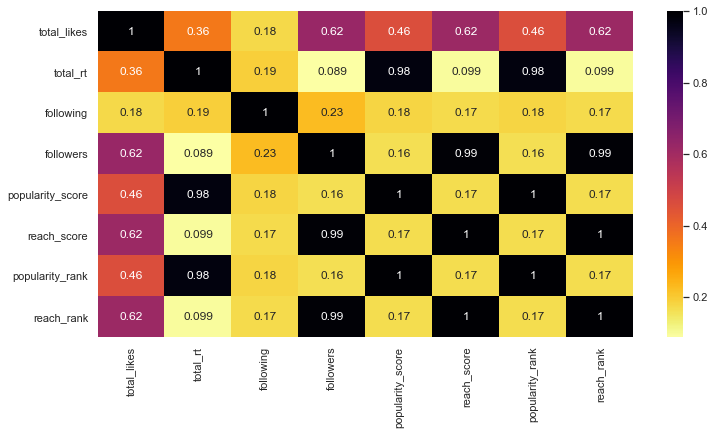

In [314]:
#Compute the spearman rank correlation

plt.figure(figsize = (12,6))
sns.heatmap(unt.corr(method = 'spearman'), annot = True, cmap = 'inferno_r');

In [ ]:
#Search for Inactive accounts
for i,handle in enumerate(inf.handle.unique()):
    unt['year'].loc[i] = inf[inf.handle == handle]['created_at'].max().date()

In [377]:
#Search for accounts that haven't made a post this year
unt[unt.year < pd.to_datetime('2020-01-01')]

,Influencer,total_likes,total_rt,following,followers,popularity_score,reach_score,popularity_rank,reach_rank,year
2,SAPresident,0,850,14,18,850,4,8.0,3.0,2019-04-20
14,BBCAndrewH,1,0,0,7,1,7,2.5,4.0,2018-05-01
20,SmithInAfrica,0,1,0,69,1,69,2.5,6.0,2015-10-19
36,africaprogress,2444,7323,3166,56250,9767,53084,36.0,40.0,2017-12-18
44,ThinkAfricaFeed,440,1542,1114,48259,1982,47145,15.0,32.0,2015-08-03
49,rangerdiaries,8500,4443,4616,20454,12943,15838,40.0,10.0,2019-07-22
54,africamedia_CPJ,0,1,0,487,1,487,2.5,7.0,2017-04-10
74,ArtSouthAfrica,7,333,132,116,340,-16,5.0,1.0,2016-07-01
82,BrendanSAfrica,1099,125099,366,28464,126198,28098,66.0,26.0,2019-02-14
84,stateafrica,1,0,0,8,1,8,2.5,5.0,2017-06-12


In [406]:
def Preprocess_hashtag(df):
    #fill missing values with zero
    df.hashtags = df.hashtags.fillna(0)
    
    #slice the dataframe to have only tweets with hashtag
    with_tags = df[df.hashtags != 0]
    
    #make all hashtags lowercase and make the spelling of covid uniform
    
    with_tags.hashtags = with_tags.hashtags.str.lower().str.replace(' ','')
    d = {'covid19':'covid', 'coronavirus':'covid' }
    with_tags.hashtags = with_tags.hashtags.replace(d)
    
    
    #Store each handle and their top 5 hashtag in their top 10 retweets in a new dataframe
    by_tags = pd.DataFrame(df.handle.unique(), columns =['handles'])
    by_tags['tags'] =0
    for i,user in enumerate(by_tags.handles):
        by_tags['tags'].loc[i]= with_tags[with_tags.handle ==  user].sort_values(by = 'retweet_count', ascending = False )['hashtags'].unique()[:5].tolist()
        
    #Calculate the number of occurence of each hashtag and return the top5
    hash1 = dict(with_tags.hashtags.value_counts()[:20])
    return with_tags, by_tags,hash1

In [407]:
with_tags, by_tags, hash1 = Preprocess_hashtag(inf)

In [441]:
hash1

{'covid': 710,
 'liveamp': 140,
 'africa': 110,
 'cnbcafrica': 89,
 'kenya': 72,
 'ethiopia': 70,
 'projectrunwaysa': 69,
 'nigeria': 63,
 'unpackafricaonyebo': 59,
 'africadaybenefitconcert': 55,
 'somalia': 55,
 'eunite947': 53,
 'southafrica': 52,
 'oscarpistorius': 41,
 'cnbcconversation': 40,
 'covid19,gautengcovid19,covid19southafrica': 40,
 'african': 38,
 'knysna': 37,
 'mtvbaselounge': 35,
 'zimbabwe': 34}

In [408]:
#Top 5 hashtags in Top 10 retweeets per handle
by_tags.head()

,handles,tags
0,Trevornoah,"[dababy,snl, dontdeportmelania, betweenthescen..."
1,GarethCliff,"[locksouthafricadown,lockdownmzansi,covid_19sa..."
2,SAPresident,"[fridayfelling,fullloadworkpresure, business,s..."
3,News24,"[loadshedding, extendthelicence, covid]"
4,Julius_S_Malema,"[lockdownsa,blacklivesmatter, lockdownhousepar..."


check for similarities between handles based on the Top 20 most used hashtags

In [412]:
#Check for the similarity based on the top20 hashtags
sim = pd.DataFrame(np.ones(1840, dtype = 'int').reshape(92,20), columns= hash1.keys())
for i,user in enumerate(by_tags.handles):
    for j,cols in enumerate(sim.columns):
        if cols in by_tags.tags[i]:
            sim[cols].loc[i] = 1
        else:
            sim[cols].loc[i] = 0

In [413]:
sim.head()

,covid,liveamp,africa,cnbcafrica,kenya,ethiopia,projectrunwaysa,nigeria,unpackafricaonyebo,africadaybenefitconcert,somalia,eunite947,southafrica,oscarpistorius,cnbcconversation,"covid19,gautengcovid19,covid19southafrica",african,knysna,mtvbaselounge,zimbabwe
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [414]:
sim.sum()

covid                                        24
liveamp                                       1
africa                                        5
cnbcafrica                                    0
kenya                                         2
ethiopia                                      5
projectrunwaysa                               0
nigeria                                       4
unpackafricaonyebo                            1
africadaybenefitconcert                       0
somalia                                       0
eunite947                                     1
southafrica                                   1
oscarpistorius                                0
cnbcconversation                              1
covid19,gautengcovid19,covid19southafrica     0
african                                       2
knysna                                        1
mtvbaselounge                                 0
zimbabwe                                      0
dtype: int64

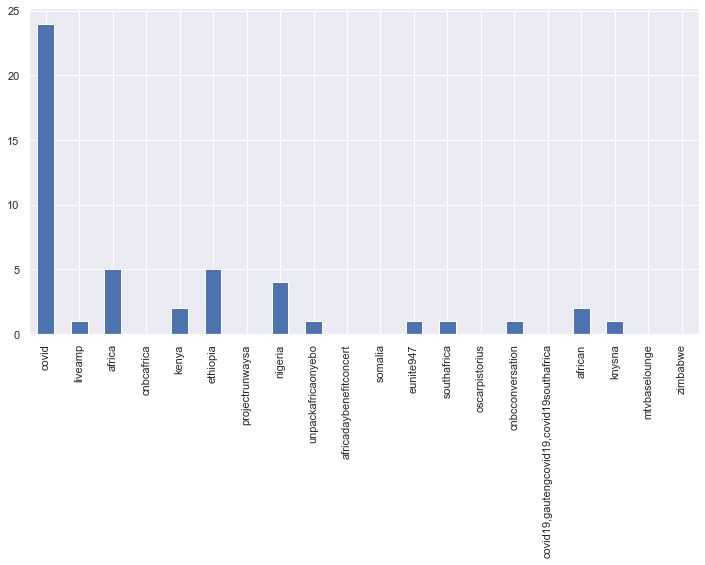

In [416]:
plt.figure(figsize = (12,6))
(sim.sum()).plot(kind = 'bar');

In [451]:
#import kmeans to segment the handles
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [417]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 21, init= 'k-means++')
    kmeanModel.fit(sim)
    distortions.append(kmeanModel.inertia_)

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

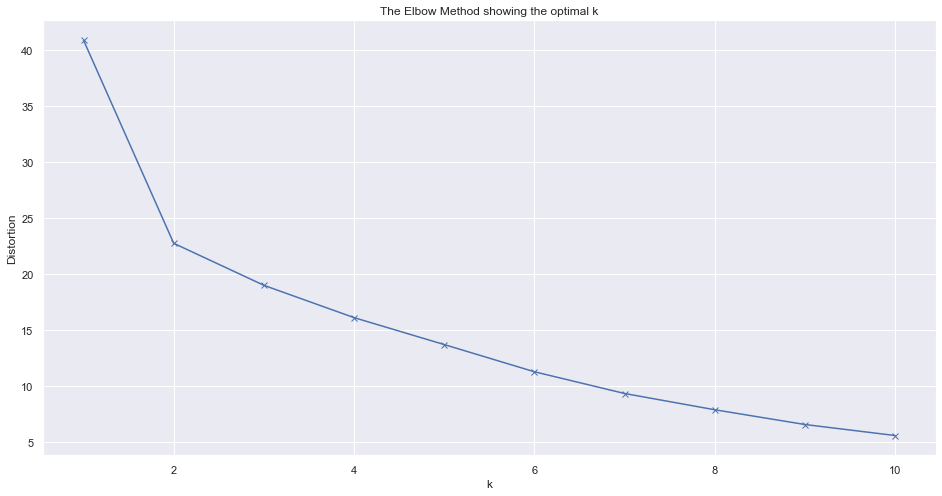

In [418]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')


In [419]:
km = KMeans(n_clusters=3, random_state= 21)
sim['group'] = km.fit_predict(sim)

In [423]:
sim['handle'] = inf.handle.unique()

In [424]:
sim[['handle','group']].head()

,handle,group
0,Trevornoah,2
1,GarethCliff,2
2,SAPresident,2
3,News24,1
4,Julius_S_Malema,2


In [442]:
unt['group'] = sim.group ; unt.head()

,Influencer,total_likes,total_rt,following,followers,popularity_score,reach_score,popularity_rank,reach_rank,year,group
0,Trevornoah,1935138,6018118,325,10802761,7953256,10802436,92.0,92.0,2020-07-13,2
1,GarethCliff,22304,107548,356,1974477,129852,1974121,68.0,89.0,2020-07-17,2
2,SAPresident,0,850,14,18,850,4,8.0,3.0,2019-04-20,2
3,News24,30478,14655,632,3575189,45133,3574557,56.0,91.0,2020-07-17,1
4,Julius_S_Malema,169677,281459,652,3125922,451136,3125270,82.0,90.0,2020-07-16,2


In [446]:
unt.sort_values(by = ['popularity_rank','reach_rank'], ascending = False).head()

,Influencer,total_likes,total_rt,following,followers,popularity_score,reach_score,popularity_rank,reach_rank,year,group
0,Trevornoah,1935138,6018118,325,10802761,7953256,10802436,92.0,92.0,2020-07-13,2
28,JendayiFrazer,23,1290779,480,29941,1290802,29461,91.0,29.0,2020-07-05,2
47,schneiderhome,14914,1100064,1008,26399,1114978,25391,90.0,23.0,2020-07-16,2
43,AfricaGoodNews,12,877549,757,50070,877561,49313,89.0,36.0,2020-07-17,2
8,loyisogola,17514,563804,3948,1085167,581318,1081219,88.0,83.0,2020-07-16,2


visualizing clusters

In [449]:
unt[unt.group == 2]

,Influencer,total_likes,total_rt,following,followers,popularity_score,reach_score,popularity_rank,reach_rank,year,group
0,Trevornoah,1935138,6018118,325,10802761,7953256,10802436,92.0,92.0,2020-07-13,2
1,GarethCliff,22304,107548,356,1974477,129852,1974121,68.0,89.0,2020-07-17,2
2,SAPresident,0,850,14,18,850,4,8.0,3.0,2019-04-20,2
4,Julius_S_Malema,169677,281459,652,3125922,451136,3125270,82.0,90.0,2020-07-16,2
5,helenzille,37165,31109,2304,1443232,68274,1440928,62.0,87.0,2020-06-24,2
...,...,...,...,...,...,...,...,...,...,...,...
86,oafrica,455,3414,2877,31296,3869,28419,23.0,28.0,2017-02-20,2
88,AfricaCheck,1880,1966,4590,68055,3846,63465,22.0,46.0,2020-07-17,2
89,AndiMakinana,9592,146387,2840,101238,155979,98398,70.0,52.0,2020-07-17,2
90,a24media,481,581,3059,31286,1062,28227,10.0,27.0,2020-07-17,2


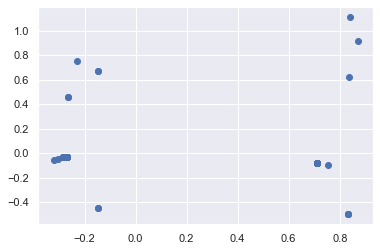

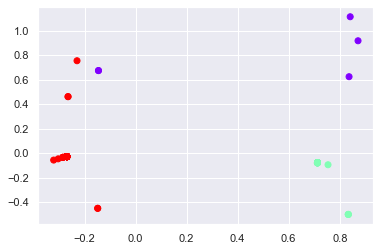

In [457]:
pca = PCA().fit(sim.drop(['group','handle'], axis = 1))
pca_2d = pca.transform(sim.drop(['group','handle'], axis = 1))
plt.figure('Reference Plot')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1])
plt.figure('K-means with 3 clusters')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=km.labels_, cmap = 'rainbow')
plt.show()

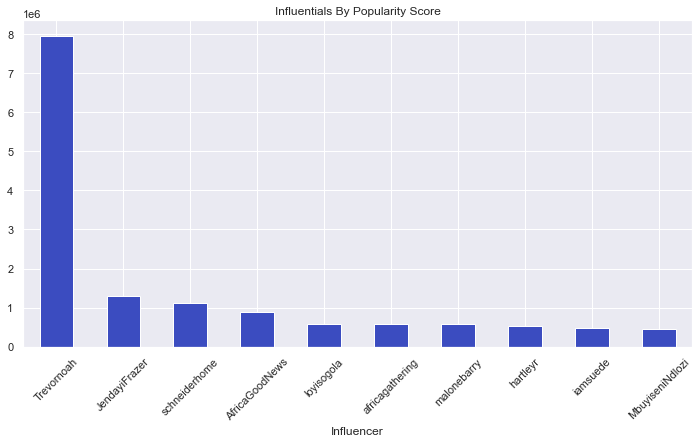

In [484]:
plt.figure(figsize = (12,6))
unt.groupby('Influencer')['popularity_score'].max().sort_values(ascending = False)[:10].plot(kind = 'bar', cmap = 'coolwarm');
plt.xticks(rotation = 45, );
plt.title("Influentials By Popularity Score");

#### Analysing Data from GovtHandles

In [ ]:
#Repeating the above steps for the Govt handle.

In [217]:
Top_Govt = pd.read_csv('pages20AfricanLeaders.csv')

In [218]:
Top_Govt.columns = ['id', 'created_at', 'source', 'original_text','clean_text', 
                        'sentiment','polarity','subjectivity', 'lang', 'favorite_count',
                         'retweet_count', 'handle', 'original_author', 'hashtags',
                          'user_mentions','followers_count','friends_count', 'place', 
                         'place_coord_boundaries']
Top_Govt.head(2)

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,handle,original_author,hashtags,user_mentions,followers_count,friends_count,place,place_coord_boundaries
0,1283799918939975680,Thu Jul 16 16:25:27 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",Minister of Health Lizzie Nkosi announces one ...,Minister Health Lizzie Nkosi announces one new...,"Sentiment(polarity=0.06818181818181818, subjec...",0.068182,0.602273,en,52,22,EswatiniGovern1,False,"COVID19, COVID19",NaN,11279,82,NaN,Eswatini
1,1283444273149620224,Wed Jul 15 16:52:14 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",Ministerial Statement: Minister of Health Lizz...,Ministerial Statement Minister Health Lizzie N...,"Sentiment(polarity=0.06818181818181818, subjec...",0.068182,0.602273,en,28,13,EswatiniGovern1,False,COVID19,NaN,11279,82,NaN,Eswatini


In [356]:
Top_Govt.created_at = pd.to_datetime(Top_Govt.created_at)

In [318]:
unt2 = AddCols(Top_Govt)

In [319]:
unt2.head()

,Influencer,total_likes,total_rt,following,followers,popularity_score,reach_score,popularity_rank,reach_rank
0,EswatiniGovern1,8369,2394,82,11279,10763,11197,14.0,11.0
1,MalawiGovt,11069,6274,26,39165,17343,39139,17.0,14.0
2,hagegeingob,113720,18775,55,192162,132495,192107,24.0,19.0
3,FinanceSC,122,625,224,126,747,-98,4.0,1.0
4,PresidencyZA,38776,16755,14,1597498,55531,1597484,21.0,28.0


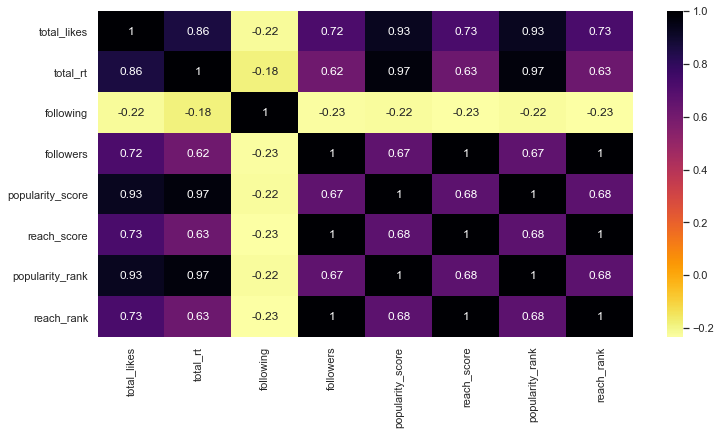

In [320]:
plt.figure(figsize = (12,6))
sns.heatmap(unt2.corr(method = 'spearman'), annot = True, cmap = 'inferno_r');

In [394]:
#Search for earliest tweet from each handle
for i,handle in enumerate(Top_Govt.handle.unique()):
    unt2['year'].loc[i] = Top_Govt[Top_Govt.handle == handle]['created_at'].max().date()

In [395]:
#Search for accounts that haven't made a tweet this year
unt2[unt2.year < pd.to_datetime('2020-01-01')]

,Influencer,total_likes,total_rt,following,followers,popularity_score,reach_score,popularity_rank,reach_rank,year
20,PresidentABO,270,883,4,173206,1153,173202,5.0,18.0,2019-12-13


In [398]:
#Search for accounts that haven't made a tweet in 3 months
unt2[unt2.year < pd.to_datetime('2020-04-01')]

,Influencer,total_likes,total_rt,following,followers,popularity_score,reach_score,popularity_rank,reach_rank,year
19,Presidence_RDC,2134,842,125,339736,2976,339611,8.0,21.0,2020-03-03
20,PresidentABO,270,883,4,173206,1153,173202,5.0,18.0,2019-12-13


In [425]:
with_t, by_t, tags_dict = Preprocess_hashtag(Top_Govt)

In [427]:
govt_sim = pd.DataFrame(np.ones(620, dtype = 'int').reshape(31,20), columns= tags_dict.keys())

In [428]:
for i,user in enumerate(by_t.handles):
    for j,cols in enumerate(govt_sim.columns):
        if cols in by_tags.tags[i]:
            govt_sim[cols].loc[i] = 1
        else:
            govt_sim[cols].loc[i] = 0

In [429]:
govt_sim.head()

,covid,eritrea,sona2019,ramaphosa,"covid19,fa4jr",gambia,"fpe2020,malawidecides2020",chiefsindaba2018,burundi,malawi,somalia,"covid19measuressc,privatesector",rwanda,zimbabwe,sierraleone,eritrean,inaugurationmalawi2020,"covid19,coronavirus",fa4jr,zambia
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [435]:
govt_sim.columns[govt_sim.columns.str.contains('co')]

Index(['covid', 'covid19,fa4jr', 'covid19measuressc,privatesector',
       'covid19,coronavirus'],
      dtype='object')

In [436]:
govt_sim.sum()

covid                              7
eritrea                            0
sona2019                           0
ramaphosa                          1
covid19,fa4jr                      0
gambia                             0
fpe2020,malawidecides2020          0
chiefsindaba2018                   0
burundi                            0
malawi                             0
somalia                            0
covid19measuressc,privatesector    0
rwanda                             0
zimbabwe                           0
sierraleone                        0
eritrean                           0
inaugurationmalawi2020             0
covid19,coronavirus                1
fa4jr                              0
zambia                             0
dtype: int64

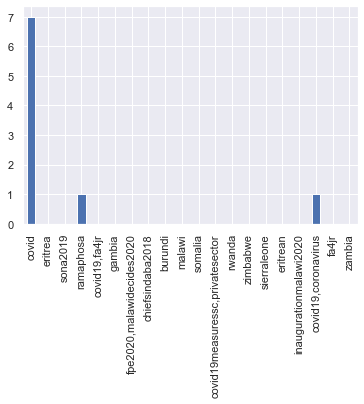

In [437]:
(govt_sim.sum()).plot(kind = 'bar');